In [1]:
import cv2 as cv #memanggil library cv2 dengan nama alias cv. Library ini digunakan untuk melakukan operasi dasar matriks 
import matplotlib.pyplot as plt #memanggil fungsi pyplot library matplotlib dengan nama alias plt. Library ini digunakan untuk membaca gambar
import numpy as np #memanggil library numpy dengan nama alias np. Library ini digunakan untuk membuat matriks

In [2]:
image = cv.imread("bunga.jpg") #membaca citra menggunakan fungsi imread dari library cv2
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #menyimpan citra skala abu-abu ke variabel gray dengan menggunakan fungsi-fungsi dari cv2
plt.imshow(gray, cmap="gray") #menampilkan citra skala abu-abu dengan cmap gray

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
def show(img1,img2,img3,title):
    plt.figure(figsize=(15,10))#Figure adalah kontainer top level untuk menampung segala elemen plot pada visualisasi. Figure sendiri bisa kita ibaratkan sebagai kanvas saat kita melukis.
    plt.subplot(1,3,1) #Fungsi subplots() mengambil tiga argumen yang menjelaskan layout gambar.Layout diatur dalam baris dan kolom, yang diwakili oleh argumen pertama dan kedua. Argumen ketiga mewakili indeks plot saat ini.
    plt.ylabel(title)
    plt.title('3x3')
    plt.imshow(img1, cmap='gray')
    plt.subplot(1,3,2)#gambar tersebut memiliki 2 baris, 2 kolom, dan plot ini adalah plot Kedua.
    plt.title('5x5')
    plt.imshow(img2, cmap='gray')
    plt.subplot(1,3,3)#plot ini berada pada baris ke 2 kolom pertama
    plt.title('7x7')
    plt.imshow(img3, cmap='gray')

In [ ]:
#Median filtering
def Median (matriks) :
    array = np.sort (matriks, axis = None)
    total = len (array)
    return (array [int ((total-1)/2)])

def Medianfilter(image, horizontal, vertikal):
    tinggi, lebar = image.shape
    hasil = np.zeros(image.shape)
    horizontal2, vertikal2 = int ((horizontal-1)/2), int ((vertikal-1)/2)
    pad = np.pad (image, ((horizontal2,horizontal-horizontal2-1),(vertikal2,vertikal-vertikal2-1)) , "edge" )
    for i in range (tinggi):
        for j in range (lebar):
            hasil[i,j] = Median(pad[i:i+horizontal, j:j+vertikal])
    return hasil

In [ ]:
#Mean filtering
def Mean (matriks) :
    array = np.sum (matriks)
    horizontal, vertikal = matriks.shape
    return (array/(horizontal*vertikal))

def Meanfilter(image, horizontal, vertikal):
    tinggi, lebar = image.shape
    hasil = np.zeros(image.shape)
    horizontal2, vertikal2 = int ((horizontal-1)/2), int ((vertikal-1)/2)
    pad = np.pad (image, ((horizontal2,horizontal-horizontal2-1),(vertikal2,vertikal-vertikal2-1)) , "edge" )
    for i in range (tinggi):
        for j in range (lebar):
            hasil[i,j] = Mean(pad[i:i+horizontal, j:j+vertikal])
    return hasil

In [ ]:
#Modus filtering
def Modus(matriks):
    array = np.sort (matriks, axis=None)
    indeks = np.zeros ( np.max(array)+1, dtype= int )
    for i in range (len(array)):
        indeks[array[i]] += 1
        
    cek = np.max(indeks)
    for j in range (len(indeks)):
        if (indeks[j] == cek):
            return j
        
def Modusfilter(image, horizontal, vertikal):
    tinggi,lebar = image.shape
    hasil = np.zeros(image.shape)
    horizontal2, vertikal2 = int ((horizontal-1)/2), int ((vertikal-1)/2)
    pad = np.pad (image, ((horizontal2,horizontal-horizontal2-1),(vertikal2,vertikal-vertikal2-1)) , "edge" )
    for i in range (tinggi):
        for j in range (lebar):
            hasil[i,j] = Modus(pad[i:i+horizontal, j:j+vertikal])
    return hasil

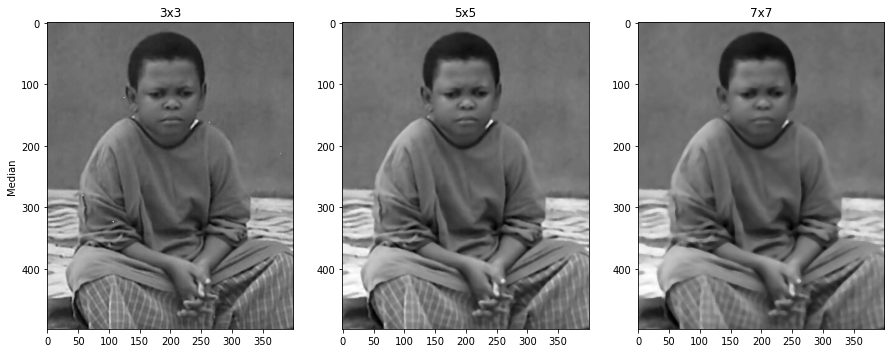

In [ ]:
#Menampilkan median
median1 = Medianfilter(gray, 3,3)
median2 = Medianfilter(gray, 5,5)
median3 = Medianfilter(gray, 7,7)
show(median1,median2,median3,'Median')

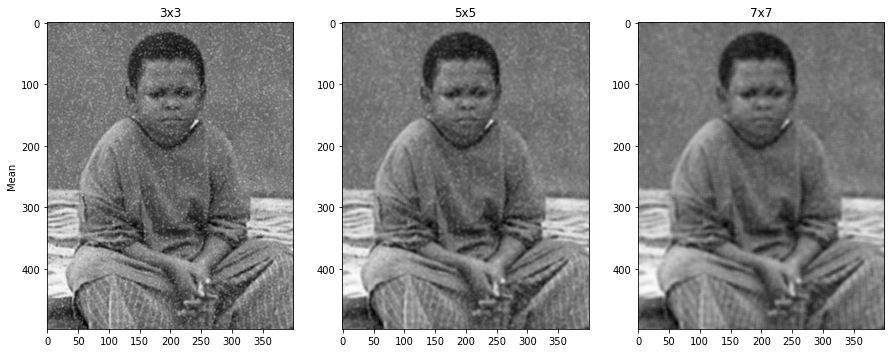

In [ ]:
#Menampilkan mean
mean1 = Meanfilter(gray, 3,3)
mean2 = Meanfilter(gray, 5,5)
mean3 = Meanfilter(gray, 7,7)
show(mean1,mean2,mean3,'Mean')

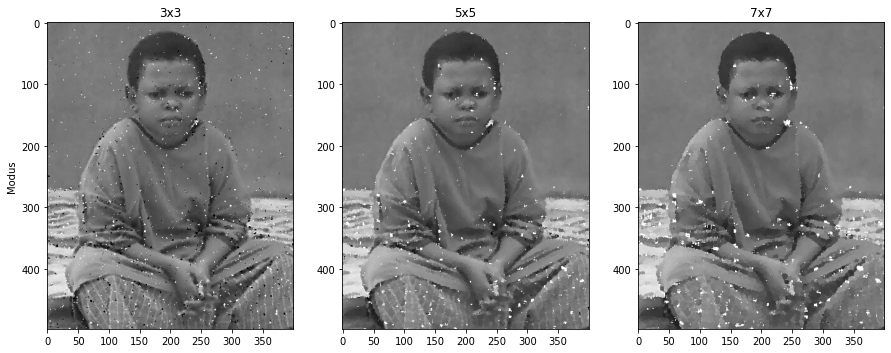

In [ ]:
#Menampilkan modus
modus1 = Modusfilter(gray, 3,3)
modus2 = Modusfilter(gray, 5,5)
modus3 = Modusfilter(gray, 7,7)
show(modus1,modus2,modus3,'Modus')